In [29]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Import the data
from sklearn.datasets import load_iris

In [30]:
iris = pd.read_csv("F://dataset_2.csv")

In [31]:
iris["Species"] = pd.factorize(iris['Species'])[0]
iris_data = iris[["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"]] 
iris_target = iris["Species"]

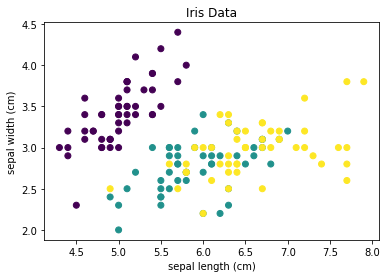

In [33]:
plt.scatter(iris_data['SepalLengthCm'],
            iris_data['SepalWidthCm'], 
            c = iris_target)
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.title('Iris Data')
plt.show()

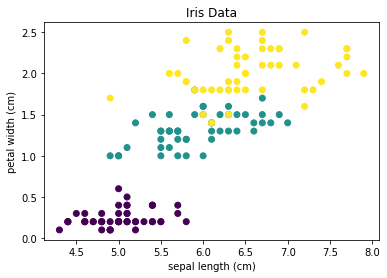

In [35]:
plt.scatter(iris_data['SepalLengthCm'],
            iris_data['PetalWidthCm'], 
            c = iris_target)
plt.xlabel('sepal length (cm)')
plt.ylabel('petal width (cm)')
plt.title('Iris Data')
plt.show()

In [36]:
from itertools import combinations

In [40]:
L = list(x for x in combinations(iris_data.columns, 2))

In [41]:
L

[('SepalLengthCm', 'SepalWidthCm'),
 ('SepalLengthCm', 'PetalLengthCm'),
 ('SepalLengthCm', 'PetalWidthCm'),
 ('SepalWidthCm', 'PetalLengthCm'),
 ('SepalWidthCm', 'PetalWidthCm'),
 ('PetalLengthCm', 'PetalWidthCm')]

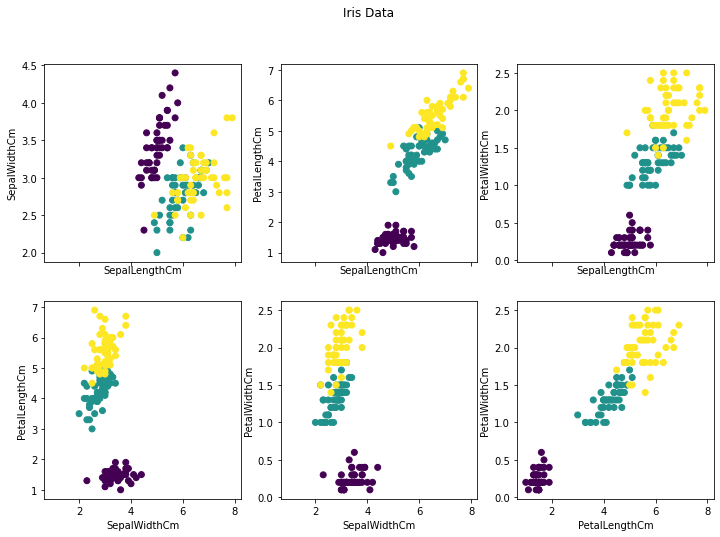

In [42]:
fig, ax = plt.subplots(nrows = 2, 
                       ncols = 3, 
                       sharex = True, 
                       figsize = (12, 8))

for p, q in zip(L, [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2)]):
    ax[q[0], q[1]].scatter(iris_data[p[0]],
                           iris_data[p[1]],
                           c = iris_target)
    ax[q[0], q[1]].set_xlabel(p[0])
    ax[q[0], q[1]].set_ylabel(p[1])

fig.suptitle('Iris Data')
plt.show()

In [43]:
X = iris_data[['PetalLengthCm',
                  'PetalWidthCm' ]].to_numpy()

y = iris_target.to_numpy()

In [44]:
X[51]

array([4.5, 1.5])

In [45]:
from sklearn.model_selection import train_test_split

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y, 
                                                    test_size=0.33, 
                                                    random_state=42)

In [47]:
def distance(p, q):
    return np.sqrt((p - q) @ (p - q))

In [48]:
distance(X[10], X[67])

2.7202941017470885

In [49]:
def k_nearest_neighbors(point, 
                        training_features, 
                        training_labels, 
                        k):
    neighbors = []
    for i, p in enumerate(training_features):
        d = distance(point, p)
        temp_data = [p, training_labels[i], d]
        neighbors.append(temp_data)
        
    neighbors.sort(key = lambda x : x[-1])
    
    return neighbors[:k]

In [50]:
k_nearest_neighbors(X_test[-1], X_train, y_train, 5)

[[array([6. , 2.5]), 2, 0.09999999999999964],
 [array([6.1, 2.3]), 2, 0.20000000000000018],
 [array([5.7, 2.5]), 2, 0.39999999999999947],
 [array([5.7, 2.3]), 2, 0.44721359549995754],
 [array([5.9, 2.1]), 2, 0.44721359549995754]]

In [51]:
y_test[-1]

2

In [52]:
def KNN_Predict(point, 
                training_features, 
                training_labels, 
                k, 
                regression = False):
    
    neighbors = k_nearest_neighbors(point, 
                                    training_features, 
                                    training_labels, 
                                    k)
    
    if regression == False:
        labels = [x[1] for x in neighbors]
        return max(labels, key = labels.count)
    
    else:
        return sum(x[1] for x in neighbors)/k

In [53]:
def classification_error(test_features, 
                         test_labels,
                         training_features, 
                         training_labels,
                         k):
    error = 0
    for i, point in enumerate(test_features):
        error += test_labels[i] != KNN_Predict(point, 
                                               training_features, 
                                               training_labels, 
                                               k)
    return error/k

In [54]:
classification_error(X_test, y_test, X_train, y_train, 7)

0.14285714285714285

In [55]:
possible_k = [x for x in range(3, 26, 2)]
errors = [classification_error(X_test,
                               y_test,
                               X_train,
                               y_train, k) for k in possible_k]

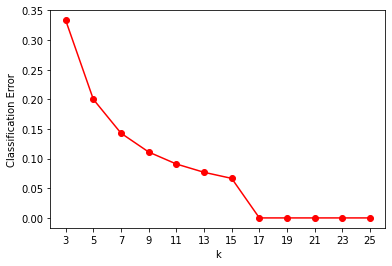

In [56]:
plt.plot(possible_k, errors, color = 'red')
plt.scatter(possible_k, errors, color = 'red')
plt.xlabel('k')
plt.ylabel('Classification Error')
plt.xticks(possible_k)
plt.show()

In [57]:
predicted_labels = [KNN_Predict(point, 
                                X_train, 
                                y_train, 
                                9) for point in X_test]

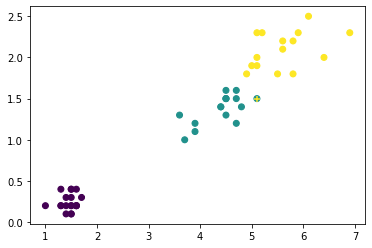

In [58]:
plt.scatter(X_test[:, 0], X_test[:, 1], c = predicted_labels)

plt.scatter(X_test[:, 0], X_test[:, 1], c = y_test, marker = '+')

In [59]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [60]:
neigh.predict(X_test)

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0,
       0, 1, 1, 2, 1, 2], dtype=int64)

In [61]:
y_test

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0,
       0, 1, 2, 2, 1, 2], dtype=int64)

In [65]:
X = iris_data[['PetalLengthCm',
                  'PetalWidthCm' ]].to_numpy()
y = iris_data["SepalLengthCm"].to_numpy()

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y, 
                                                    test_size=0.33, 
                                                    random_state=42)

In [67]:
predicted_labels = [KNN_Predict(point, 
                                X_train, 
                                y_train, 
                                3,
                                regression = True)
                    for point in X_test]

In [68]:
np.sqrt((y_test - predicted_labels) @ (y_test - predicted_labels))

3.000000000000002

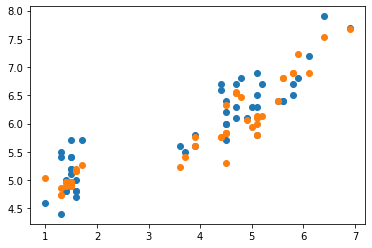

In [69]:
plt.scatter(X_test[:, 0], y_test)

plt.scatter(X_test[:, 0], predicted_labels)